In [1]:
#import the library
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
startups=pd.read_csv('50_Startups.csv')

In [3]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startups.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [6]:
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
#Data Preprocessing
#missing values
startups.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<AxesSubplot:ylabel='R&D Spend'>

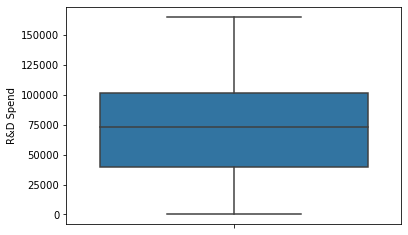

In [17]:
#outlier treatment #outlier treatment not needed in Decision Tree(plz check notes for details)
#sns.boxplot(y='R&D Spend',data=startups)#outliers not there

<AxesSubplot:ylabel='Administration'>

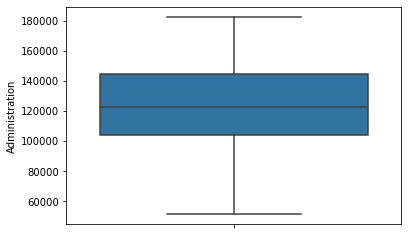

In [18]:
#sns.boxplot(y='Administration',data=startups)#no outliersA

<AxesSubplot:ylabel='Marketing Spend'>

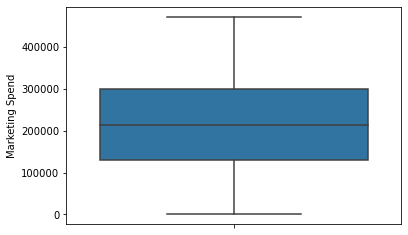

In [19]:
#sns.boxplot(y='Marketing Spend',data=startups)#no outliersA

In [8]:
#Encoding
startups.State.unique

<bound method Series.unique of 0       New York
1     California
2        Florida
3       New York
4        Florida
5       New York
6     California
7        Florida
8       New York
9     California
10       Florida
11    California
12       Florida
13    California
14       Florida
15      New York
16    California
17      New York
18       Florida
19      New York
20    California
21      New York
22       Florida
23       Florida
24      New York
25    California
26       Florida
27      New York
28       Florida
29      New York
30       Florida
31      New York
32    California
33       Florida
34    California
35      New York
36       Florida
37    California
38      New York
39    California
40    California
41       Florida
42    California
43      New York
44    California
45      New York
46       Florida
47    California
48      New York
49    California
Name: State, dtype: object>

In [9]:
startups["State"].nunique()#only 3 unique states-NewYork,Califormia,Florida

3

In [10]:
#Label Encoder
startups['State']=startups['State'].astype("category")
startups['State']=startups['State'].cat.codes

In [11]:
startups

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [12]:
startups["State"].value_counts()

2    17
0    17
1    16
Name: State, dtype: int64

In [13]:
startups=pd.get_dummies(startups,columns=['State'])

In [14]:
startups

,R&D Spend,Administration,Marketing Spend,Profit,State_0,State_1,State_2
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [15]:
#Dummy Variable
startups=startups.drop(['State_2'],axis=1)

In [16]:
startups

,R&D Spend,Administration,Marketing Spend,Profit,State_0,State_1
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1
5,131876.90,99814.71,362861.36,156991.12,0,0
6,134615.46,147198.87,127716.82,156122.51,1,0
7,130298.13,145530.06,323876.68,155752.60,0,1
8,120542.52,148718.95,311613.29,152211.77,0,0
9,123334.88,108679.17,304981.62,149759.96,1,0


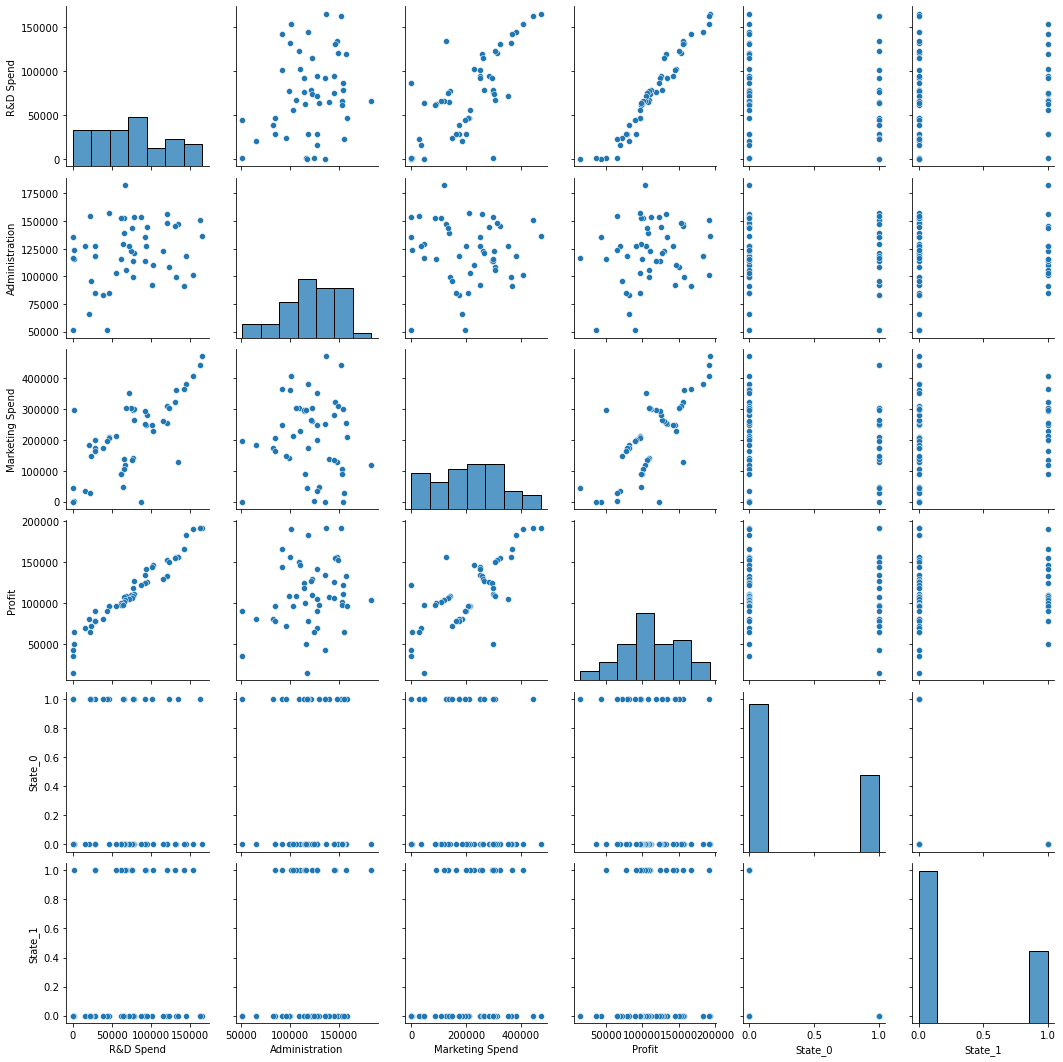

In [29]:
#EDA
sns.pairplot(startups)

<AxesSubplot:xlabel='Profit', ylabel='Density'>

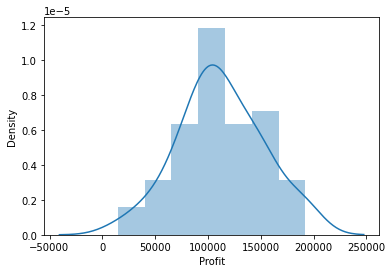

In [17]:
#Univariate Analysis
#sns.distplot(startups['Profit'])#Doing by DT so no need to check normal distribution

In [18]:
#Bivariate Analysis (correlation is a parameter)
startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_0,State_1
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244
State_0,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366
State_1,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000


<AxesSubplot:>

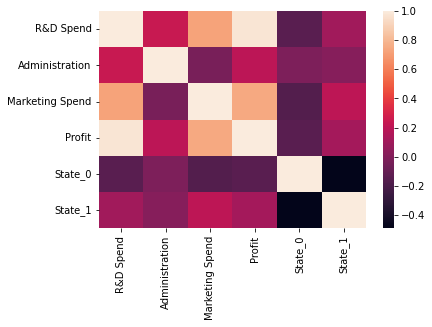

In [19]:
sns.heatmap(startups.corr())

<AxesSubplot:>

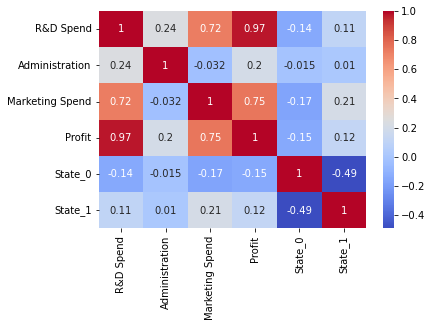

In [20]:
sns.heatmap(startups.corr(),annot=True,cmap='coolwarm')

In [21]:
#Splitting the data into independent and dependent variables
startups.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit', 'State_0',
       'State_1'],
      dtype='object')

In [22]:
x=startups[['R&D Spend', 'Administration', 'Marketing Spend','State_0','State_1']]
y=startups['Profit']

In [23]:
x.head()

,R&D Spend,Administration,Marketing Spend,State_0,State_1
0,165349.20,136897.80,471784.10,0,0
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,1
3,144372.41,118671.85,383199.62,0,0
4,142107.34,91391.77,366168.42,0,1


In [24]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [38]:
#Feature Scaling to be done only on independent variables#Feature scaling not required for Decision Tree
#from sklearn.preprocessing import StandardScaler
#standard=StandardScaler()
#x_scaled=standard.fit_transform(x)
#x_scaled

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00,
        -7.17740563e-01, -6.85994341e-01],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00,
         1.39326109e+00, -6.85994341e-01],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00,
        -7.17740563e-01,  1.45773797e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00,
        -7.17740563e-01, -6.85994341e-01],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00,
        -7.17740563e-01,  1.45773797e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00,
        -7.17740563e-01, -6.85994341e-01],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01,
         1.39326109e+00, -6.85994341e-01],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01,
        -7.17740563e-01,  1.45773797e+00],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01,
        -7.17740563e-01, -6.85994341e-01],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01,
         1.39326109e+00

In [39]:
#x=pd.DataFrame(x_scaled)

In [40]:
#x

,0,1,2,3,4
0,2.016411,0.560753,2.153943,-0.717741,-0.685994
1,1.955860,1.082807,1.923600,1.393261,-0.685994
2,1.754364,-0.728257,1.626528,-0.717741,1.457738
3,1.554784,-0.096365,1.422210,-0.717741,-0.685994
4,1.504937,-1.079919,1.281528,-0.717741,1.457738
5,1.279800,-0.776239,1.254210,-0.717741,-0.685994
6,1.340066,0.932147,-0.688150,1.393261,-0.685994
7,1.245057,0.871980,0.932186,-0.717741,1.457738
8,1.030369,0.986952,0.830887,-0.717741,-0.685994
9,1.091819,-0.456640,0.776107,1.393261,-0.685994


In [41]:
#Variance Inflation Factor to check for multi collinearity
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# variable=x_scaled
# vif=pd.DataFrame()
# vif['Variance Inflation Factor']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
# vif['Features']=x.columns
# vif

,Variance Inflation Factor,Features
0,2.495511,0
1,1.177766,1
2,2.416797,2
3,1.335061,3
4,1.361299,4


In [ ]:
#VIF -no variable had VIF  more than value 5 so it means  no multicollinearity

In [25]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=101)

In [26]:
x_train.head()

,R&D Spend,Administration,Marketing Spend,State_0,State_1
45,1000.23,124153.04,1903.93,0,0
18,91749.16,114175.79,294919.57,0,1
3,144372.41,118671.85,383199.62,0,0
41,27892.92,84710.77,164470.71,0,1
30,61994.48,115641.28,91131.24,0,1


In [27]:
y_train.head()

45     64926.08
18    124266.90
3     182901.99
41     77798.83
30     99937.59
Name: Profit, dtype: float64

In [28]:
x_test.head()

,R&D Spend,Administration,Marketing Spend,State_0,State_1
37,44069.95,51283.14,197029.42,1,0
14,119943.24,156547.42,256512.92,0,1
21,78389.47,153773.43,299737.29,0,0
32,63408.86,129219.61,46085.25,1,0
22,73994.56,122782.75,303319.26,0,1


In [29]:
y_test.head()

37     89949.14
14    132602.65
21    111313.02
32     97427.84
22    110352.25
Name: Profit, dtype: float64

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(37, 5)
(13, 5)
(37,)
(13,)


In [36]:
# #Creating Linear Model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [49]:
#print(lm.intercept_)

113161.41124762277


In [50]:
#print(lm.coef_)

[35942.63648799   617.26271744  3627.26193997  -810.67163312
  1506.17529983]


In [37]:
#Predicvt the model
y_pred_linear=lm.predict(x_test)
y_pred_linear

array([ 85566.43129955, 154645.37500641, 119781.90066241,  98074.86587858,
       118952.10614092, 188943.26200157, 115411.04437839,  61123.79354298,
        68937.97019331,  46677.35755393, 115996.41412517, 112736.1072233 ,
       164609.0143744 ])

## Decision Tree Regression Model -Train DataSet

In [32]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [33]:
y_pred=dt.predict(x_test)

In [34]:
y_pred

array([ 96479.51, 152211.77, 122776.86, 101004.64, 108733.99, 192261.83,
       122776.86,  81229.06,  77798.83,  35673.41, 118474.03, 124266.9 ,
       156122.51])

In [52]:
#Checking whether it is correct based on accuracy
#Evaluating by OLS method
#from statsmodels.regression.linear_model import OLS
#import statsmodels.regression.linear_model as smf
#reg_model=smf.OLS(endog=y_train,exog=x_train).fit()
#reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.136
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.007
Date:                Fri, 24 Jun 2022   Prob (F-statistic):                       0.430
Time:                        12:41:30   Log-Likelihood:                         -482.69
No. Observations:                  37   AIC:                                      975.4
Df Residuals:                      32   BIC:                                      983.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           4.951e+04   3.35e+04      1.480      0.149   -1.86e+04    1.18e+05
1          -8466.7222   2.22e+04     -0.382      0.705   -5.37e+04    3.67e+04
2          -1.057e+04   3.31e+04     -0.319      0.752   -7.81e+04    5.69e+04
3          -1.598e+04   2.27e+04     -0.706      0.486   -6.21e+04    3.02e+04
4          -1.031e+04   2.25e+04     -0.459      0.650   -5.61e+04    3.55e+04
==============================================================================
Omnibus:                        0.643   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.725   Jarque-Bera (JB):                0.300
Skew:                          -0.220   Prob(JB):                        0.861
Kurtosis:                       3.022   Cond. No.                         3.18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

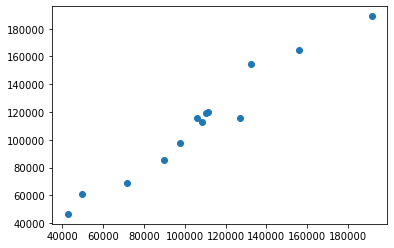

In [53]:
#Data should be linera
#plt.scatter(y_test,y_pred)

<AxesSubplot:ylabel='Density'>

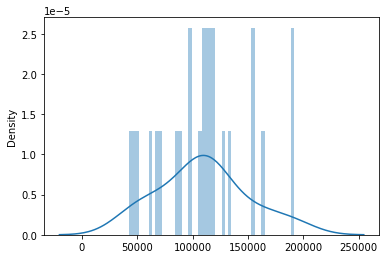

In [54]:
#Data should be normally distributed
#sns.distplot((y_test,y_pred),bins=50)

<function matplotlib.pyplot.show(close=None, block=None)>

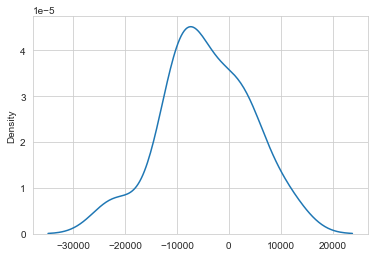

In [55]:
#delta=y_test-y_pred
#sns.set_style("whitegrid")
#sns.kdeplot(np.array(delta),bw=0.5)
#plt.show

In [56]:
#To check the model (for linear regression)
#from sklearn import metrics
#print('MAE',metrics.mean_absolute_error(y_test,y_pred))

MAE 7616.591318617623


In [57]:
#print('MAPE',metrics.mean_absolute_error(y_test,y_pred)*100)

MAPE 761659.1318617623


In [58]:
#print('MSE',metrics.mean_squared_error(y_test,y_pred))

MSE 86820183.53971823


In [59]:
#print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE 9317.734893187197


In [3]:
#from sklearn.linear_model import RidgeCV,Ridge,LassoCV,ElasticNet,ElasticNetCV,LinearRegression

In [5]:
#from sklearn.model_selection import train_test_split

In [6]:
#import statsmodels.api as sma

In [7]:
#lasso_model=LassoCV(cv=10,max_iter=10000,normalize=True)

In [60]:
#lasso_model.fit(x_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [61]:
#lasso_model.score(x_test,y_test)

0.9574330666777439

In [62]:
#Ridge Method
#ridge_cv=RidgeCV(cv=10,normalize=True)

In [63]:
#ridge_cv.fit(x_train,y_train)

RidgeCV(cv=10, normalize=True)

In [64]:
#ridge_cv.score(x_test,y_test)

0.9182889612518088

In [39]:
#to check the DT and for linear regression for testing 
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))#for decision Tree
print(r2_score(y_test,y_pred_linear))#for linear regression

0.8846616479188516
0.9428740924775628


In [43]:
#Now checking for overfitting and underfitting for DT
y_pred_train=dt.predict(x_train)#for training
y_pred_train

array([ 64926.08, 124266.9 , 182901.99,  77798.83,  99937.59, 129917.04,
       118474.03,  69758.98,  81229.06,  65200.33,  81005.76, 146121.95,
        14681.4 , 107404.34,  96778.92,  90708.19, 191050.39, 105008.31,
        96712.8 ,  96479.51, 152211.77, 122776.86, 101004.64, 141585.52,
       156991.12, 192261.83, 103282.38, 166187.94,  78239.91, 134307.35,
       149759.96,  35673.41, 108733.99, 156122.51, 125370.37, 144259.4 ,
        97483.56])

In [45]:
#to check the DT  for training and testing for overfitting
print(r2_score(y_test,y_pred))#for decision Tree for testing
print(r2_score(y_train,y_pred_train))#for decision Tree training data

0.8846616479188516
1.0


In [46]:
#If high difference between testing and training accuracy (difference more than 15)--High Variance--Go by RF
#If high bias between testing and training accuracy --High Bias--Go by XGBoost

In [48]:
#Now checking for overfitting and underfitting in linear regression
y_pred__linear_train=lm.predict(x_train)#for training
y_pred__linear_train


array([ 48985.99226363, 132552.33501199, 173692.30720344,  77479.36089563,
       102943.78710851, 146532.32896228, 115461.11154998,  61538.98547328,
        68394.50373177,  65499.6502211 ,  81252.40053049, 138541.76052627,
        47620.39500174, 102051.03173212, 101222.4197717 ,  80129.76189078,
       184445.64612443, 115837.87727447,  90210.73741321,  89821.21383304,
       153367.26203898, 117147.05079803, 103882.89398325, 133166.75264492,
       162779.62855258, 193344.22839269, 108453.45711098, 174012.12566856,
        74222.97927157, 127012.97120195, 152774.84512186,  46955.07250796,
       113505.19324629, 157243.50563708, 131941.47487026, 132818.16231882,
        99773.71011435])

In [49]:
#to check the linear regression   for training and testing 
print(r2_score(y_test,y_pred_linear))#for decision Tree for testing
print(r2_score(y_train,y_pred__linear_train))#for decision Tree training data

0.9428740924775628
0.9473736604055617


In [ ]:
#No bias almost same accuracy

# Using Random Forest Regression Model

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor

In [54]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [58]:
y_rf_predict_test=rf.predict(x_test)

In [59]:
y_rf_predict_train=rf.predict(x_train)

In [61]:
print("Training Accuracy:", r2_score(y_train,y_rf_predict_train))
print("Testing Accuracy:", r2_score(y_test,y_rf_predict_test))

Training Accuracy: 0.9869090190723798
Testing Accuracy: 0.9418679510042245
